## Oscilador Harmônico Simples:

<center> <img src = "https://upload.wikimedia.org/wikipedia/commons/0/07/Easy_harmonic_oscillator.gif"/> </center>

O oscilador harmônico simples consiste em um sistema que contém uma massa $m$ $[kg]$, sobre a qual atua uma força $\overrightarrow{F}$ $[N]$, que empurra a massa em direção ao ponto $x = 0$ (posição inicial), e que depende apenas, da posição, da massa $x$ $[m]$ e de uma constante $k$. O equilíbrio, segundo 2ª Lei de Newton, se dá por: 

$$\overrightarrow{F} = ma = -kx$$

A aceleração $a$ é igual a derivada segunda de $x$:

$$m \frac{d^{2} x}{dt^{2}} = -k x$$

Se definirmos $\omega_{0}^{2} = \frac{k}{m}$, então a solução poderá ser escrita do seguinte modo:

$$\frac{d^{2}x}{dt^{2}} + \omega_{0}^{2}x = 0$$

<center> <img src = "https://upload.wikimedia.org/wikipedia/commons/b/b9/Simple_harmonic_motion_animation_1.gif"/> </center>

O diagrama animado acima mostra o movimento harmônico simples definido como a projeção no eixo de um ponto que se move com velocidade constante em um círculo em torno da origem. 

O diagrama da direita mostra um ponto (preto) girando em um círculo de raio $A$ em torno da origem. O ângulo que ela faz com o eixo $x$ em qualquer instante t é $ωt$, onde $ω$ é sua velocidade angular em radianos por segundo. Sua projeção no eixo $y$ (vermelho) mostra movimento harmônico simples, dado por $y(t) = Asen(ωt)$. 

O diagrama da esquerda mostra o movimento plotado em função de $ωt$.

Este é o comportamento que esperamos do sistema neste projeto.

<b> Nosso sistema: </b>
* $\omega = 1,0 rad/s$ - Frequência angular (mede a rapidez em que o ângulo de fase é percorrido, este ângulo de fase corresponde à posição do corpo em oscilação);
* $v_{0} = 2,0 m/s$ - Velocidade inicial do objeto;
* $m = 1.0 kg$ - Massa do objeto;
* $x_{0} = 0 m$ - Posição inicial do objeto;

## Introdução das bibliotecas de interesse ao código:

In [59]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

## Runge-Kutta de 4ª ordem e a EDO do oscilador:

In [ ]:
def Runge_Kutt4(y, dy, t, h): # Runge-Kutta de 4ª ordem
  k1 = dy(y, t)
  k2 = dy(y + h / 2.0 * k1, t + h / 2.0)
  k3 = dy(y + h / 2.0 * k2, t + h / 2.0)
  k4 = dy(y + h * k3, t + h)
  y += h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
  t += h
  return (t, y)

def Harmonic_Oscillator_Deriv(y, t): # Função auxiliar para a EDO
  omegasq = 1 ## Omega^{2}
  return np.array([y[1], -omegasq * y[0]])

## Definindo nosso sistema e trabalhando com dados:

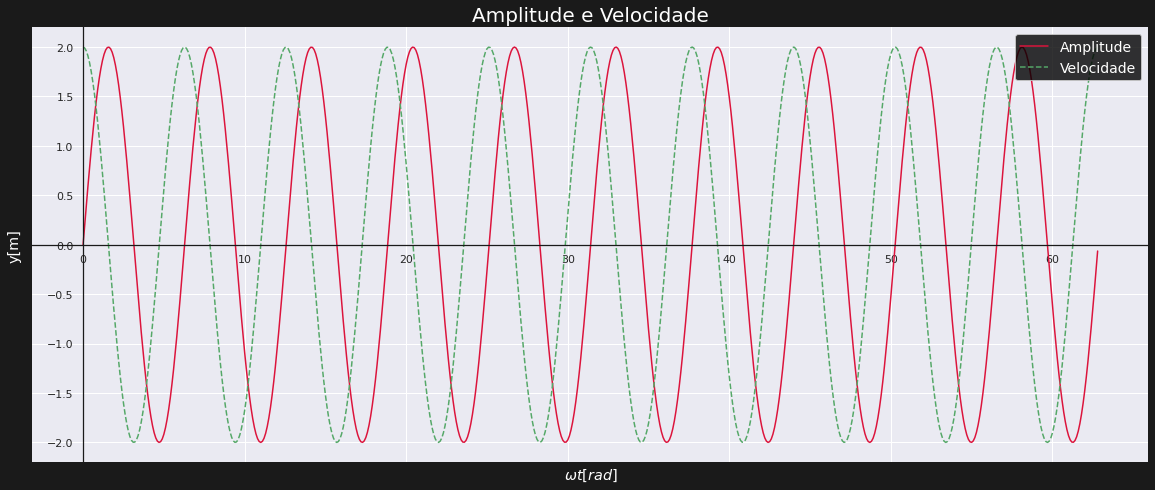

<Figure size 432x288 with 0 Axes>

In [60]:
x0 = 0.0 # Posição inicial [m]
v0 = 2.0 # Velocidade inicial [m/s]
y = np.array([x0, v0])
t = 0 # Tempo inicial
h = 0.1 # Passo para o nosso método Runge-Kutta
tmax = 20 * np.pi # Onde acabar

# Armazenar todos os tempos e soluções
ts = np.array([t]) 
ys = np.array([y])

for i in range(int(tmax/h)): # Tomar os passos suficientes (ou perto)
  (t, y) = Runge_Kutt4(y, Harmonic_Oscillator_Deriv, t, h)
  ts = np.append(ts, t)
  ys = np.concatenate((ys, np.array([y])))

# Estilizando a plotagem
sns.set_theme()
plt.rcParams.update({'text.color': "white"})
plt.rcParams.update({'legend.facecolor': "black"})
plt.rcParams.update({'axes.labelcolor': "white"})
plt.rc('axes', edgecolor = 'k')

# Plots
[y1, y2] = ys.transpose()
fig, ax = plt.subplots(figsize = (20, 8), facecolor = 'k')
plt.title('Amplitude e Velocidade', size = 20)
plt.plot(ts, y1, 'crimson', label = 'Amplitude')
plt.plot(ts, y2, 'g--', label = 'Velocidade')
plt.legend(fontsize = 14, loc = 'upper right', shadow = None)
plt.ylabel('y[m]', fontsize = 'large')
plt.xlabel(r'$\omega t [rad]$', fontsize = 'large')
ax.yaxis.set_label_coords(-0.01, 0.5)
ax.xaxis.set_label_coords(0.5, -0.01)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.show()
plt.savefig('Amplitude e Velocidade.png')

## Dataframes:

In [62]:
dic = {'t' : ts, 'v(t)': y2} # Usando dicionário para a construção do dataframe 
df = pd.DataFrame(dic)
df.head(len(df)) # 150 primeiros valores para nossa velocidade

,t,v(t)
0,0.0,2.000000
1,0.1,1.990008
2,0.2,1.960133
3,0.3,1.910673
4,0.4,1.842122
...,...,...
624,62.4,1.816332
625,62.5,1.890838
626,62.6,1.946452
627,62.7,1.982618


In [65]:
dic = {'t' : ts, 'y(m)': y1} # Usando dicionário para a construção do dataframe 
df = pd.DataFrame(dic)
df.head(len(df)) 

,t,y(m)
0,0.0,0.000000
1,0.1,0.199667
2,0.2,0.397338
3,0.3,0.591040
4,0.4,0.778836
...,...,...
624,62.4,-0.837199
625,62.5,-0.651686
626,62.6,-0.459662
627,62.7,-0.263045


## Círculo de raio A (amplitude do movimento):

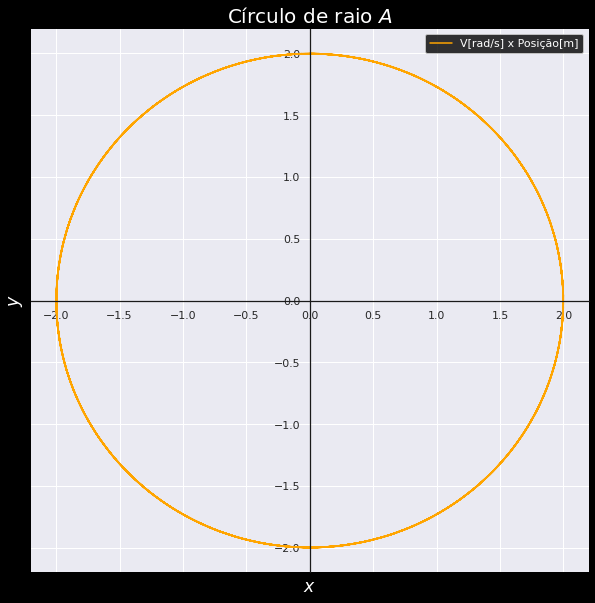

<Figure size 432x288 with 0 Axes>

In [64]:
sns.set_theme()
plt.rcParams.update({'text.color': "white"})
plt.rcParams.update({'legend.facecolor': "black"})
plt.rcParams.update({'axes.labelcolor': "white"})
plt.rc('axes', edgecolor = 'k')

fig, ax = plt.subplots(figsize = (10, 10), facecolor = 'black')
plt.title(r'Círculo de raio $A$', fontsize = 20)
plt.plot(y1, y2, 'orange', label = 'V[rad/s] x Posição[m]')
plt.xlabel(r'$x$', fontsize = 'x-large')
plt.ylabel(r'$y$', fontsize = 'x-large')
plt.legend()
ax.grid(True, which = 'both')
ax.yaxis.set_label_coords(-0.01, 0.5)
ax.xaxis.set_label_coords(0.5, -0.01)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.show()
plt.savefig('Velocidade vs Posição')

## Energia mecânica do sistema:

Podemos calcular a energia mecânica total em um ponto do sistema apenas usando nosso $k = 1$ e a amplitude ($x(t)$):

$$E_{mec} = \frac{1}{2} k A^{2}$$

Então:

$$E_{mec} = \frac{1}{2} k x(t)^{2}$$

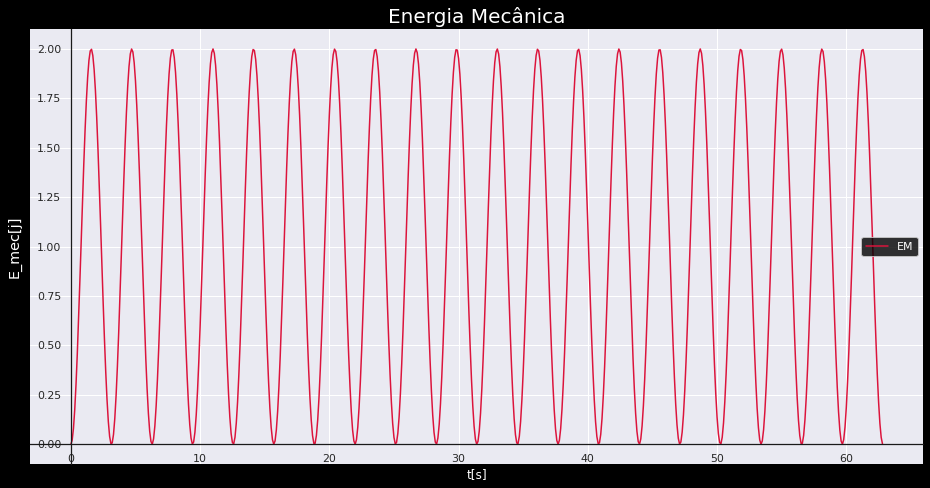

In [36]:
def E_Mec(y, t):
  k = 1.0
  Res = np.zeros(len(t))
  for i in range(0, len(t)):
    Res[i] = 0.5 * k * ((y[i]) ** 2)
  return Res

# Estilizando a plotagem
sns.set_theme()
plt.rcParams.update({'text.color': "white"})
plt.rcParams.update({'legend.facecolor': "black"})
plt.rcParams.update({'axes.labelcolor': "white"})
plt.rc('axes', edgecolor = 'k')

Res = E_Mec(y1, ts)
fig, ax = plt.subplots(figsize = (16, 8), facecolor = 'black')
plt.xlabel(r"t[s]")
plt.ylabel(r"E_mec[j]", fontsize = 'large')
plt.title('Energia Mecânica', fontsize = 20)
plt.plot(ts, Res, 'crimson', label = 'EM')
plt.legend()
ax.grid(True, which = 'both')
ax.yaxis.set_label_coords(-0.01, 0.5)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.savefig('EM')
plt.show()